<a href="https://colab.research.google.com/github/corinnakeum1/DS-4002/blob/main/BootStrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://www.github.com/DS3001/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 4.41 MiB/s, done.
Resolving deltas: 100% (3/3), done.


Q1. A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

Imagine rolling two dice,d1
 and d2
. Let Rmin
 be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of
Rmin? Plot the probability and cumulative distribution functions for Rmin
. Compute this by hand and simulate it using the law of large numbers.
Imagine rolling three dice,
d1 , d2  
, and d3
. Let Rmed
 be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of
? Plot the probability and cumulative distribution functions for
. I recommend using simulations and the law of large numbers.
Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers. (Hint: The while loop might be useful in this case.)

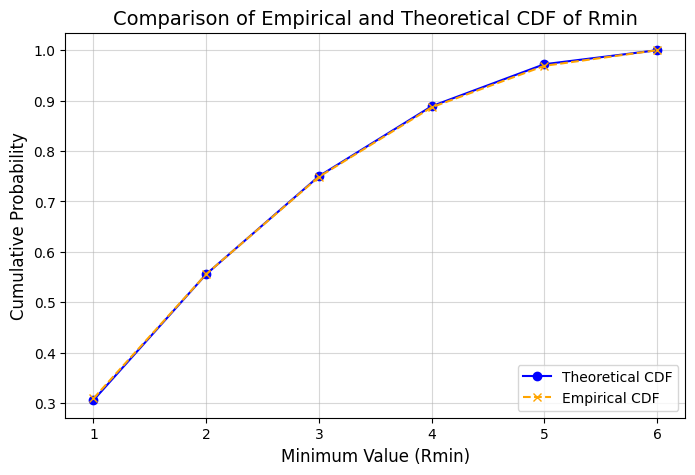

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the faces of a six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Explicit calculation of PDF and CDF
pdf = np.zeros(6)  # Array to store the probability of each minimum value
for d1 in faces:  # Loop over first die outcomes
    for d2 in faces:  # Loop over second die outcomes
        min_value = min(d1, d2)  # Compute the minimum of the two rolls
        pdf[min_value - 1] += 1  # Increment the count for the observed minimum

pdf = pdf / 36  # Normalize by the total number of outcomes (6x6)
cdf = np.cumsum(pdf)  # Calculate the cumulative distribution function (CDF)

# Simulate the process (Bootstrap)
N = 10000  # Number of simulations
roll_1 = np.random.choice(faces, size=N)  # Simulate the first die rolls
roll_2 = np.random.choice(faces, size=N)  # Simulate the second die rolls
min_rolls = np.minimum(roll_1, roll_2)  # Compute the minimum for each roll pair

# Calculate the Empirical CDF (ECDF)
ecdf = np.zeros(6)  # Array to store ECDF values
for i, face in enumerate(faces):
    ecdf[i] = np.sum(min_rolls <= face) / N  # Proportion of samples ≤ each face value

# Plot the Theoretical CDF and ECDF
plt.figure(figsize=(8, 5))
plt.plot(faces, cdf, label='Theoretical CDF', linestyle='-', marker='o', color='blue')
plt.plot(faces, ecdf, label='Empirical CDF', linestyle='--', marker='x', color='orange')
plt.xlabel("Minimum Value (Rmin)", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.title("Comparison of Empirical and Theoretical CDF of Rmin", fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()


Expected Value of the Median (Rmed): 3.4846


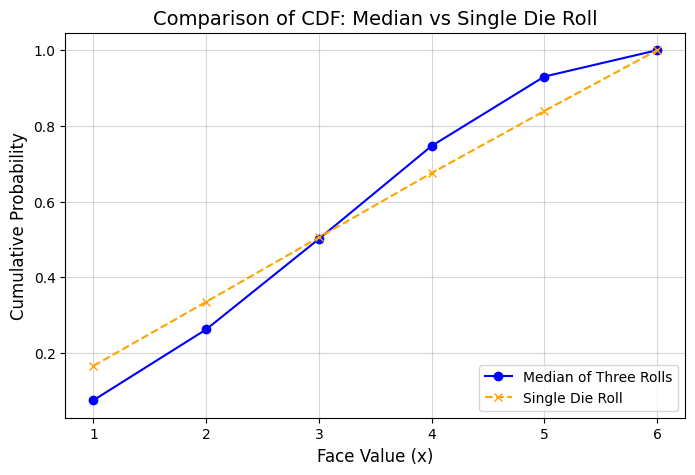

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the faces of a six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Number of simulations
N = 5000

# Simulate rolling three dice
roll_1 = np.random.choice(faces, size=N)  # First die rolls
roll_2 = np.random.choice(faces, size=N)  # Second die rolls
roll_3 = np.random.choice(faces, size=N)  # Third die rolls

# Calculate the median of each triplet of rolls
med_rolls = np.median(np.array([roll_1, roll_2, roll_3]), axis=0).astype(int)

# Calculate the expected value of the median
expected_value = np.mean(med_rolls)
print('Expected Value of the Median (Rmed):', expected_value)

# Empirical CDF for the median (Rmed)
ecdf_median = np.zeros(6)  # Array to store ECDF values for the median
for i, face in enumerate(faces):
    ecdf_median[i] = np.sum(med_rolls <= face) / N  # Proportion of medians ≤ each face value

# Empirical CDF for a single die roll (for comparison)
ecdf_single = np.zeros(6)  # Array to store ECDF values for a single die roll
for i, face in enumerate(faces):
    ecdf_single[i] = np.sum(roll_1 <= face) / N  # Proportion of single rolls ≤ each face value

# Plot the comparison of CDFs
plt.figure(figsize=(8, 5))
plt.plot(faces, ecdf_median, label='Median of Three Rolls', linestyle='-', marker='o', color='blue')
plt.plot(faces, ecdf_single, label='Single Die Roll', linestyle='--', marker='x', color='orange')
plt.xlabel("Face Value (x)", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.title("Comparison of CDF: Median vs Single Die Roll", fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.5)
plt.show()


Descriptive Statistics for Total Score:
              Total
count  50000.000000
mean       4.184700
std        3.282761
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       37.000000


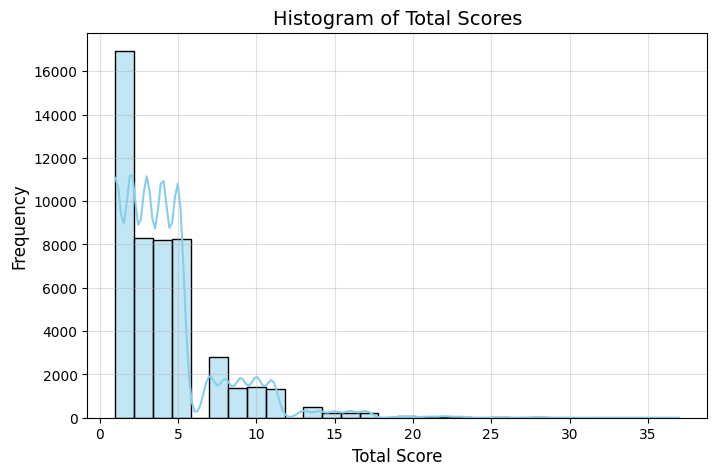

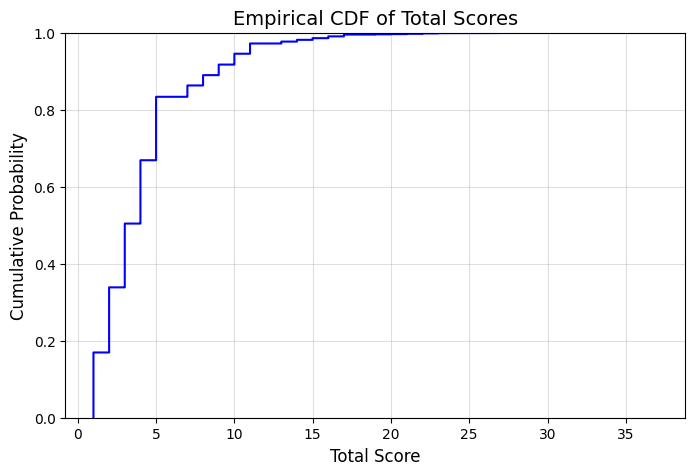

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the faces of a six-sided die
faces = np.array([1, 2, 3, 4, 5, 6])

# Number of simulations
N = 50000

# Initialize an empty list to store results
results = []

# Simulate the dice rolling process
for i in range(N):
    total = 0  # Initialize the total sum for each simulation
    rolling = True  # Flag to determine whether to continue rolling
    while rolling:
        roll = np.random.choice(faces, size=1)[0]  # Roll the die
        total += roll  # Add the roll to the total
        if roll < 6:  # Stop rolling if the roll is less than 6
            rolling = False
    results.append(total)  # Append the total to results

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results, columns=["Total"])

# Print descriptive statistics of the results
print("Descriptive Statistics for Total Score:")
print(results_df.describe())

# Plot the histogram of results
plt.figure(figsize=(8, 5))
sns.histplot(results_df["Total"], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of Total Scores", fontsize=14)
plt.xlabel("Total Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

# Plot the empirical CDF of results
plt.figure(figsize=(8, 5))
sns.ecdfplot(results_df["Total"], color="blue")
plt.title("Empirical CDF of Total Scores", fontsize=14)
plt.xlabel("Total Score", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


Q3. This question refers to the diabetes_hw.csv data. It contains two variables, outcome and treatment. Each is looking at whether an individual's diabetes was successfully treated (outcome==success) with lifestyle interventions like exercises and diets, a drug denoted by met (metformin), or a drug denoted by rosi (rosiglitazone), or not (outcome==failure). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

Cross tabulate treatment and outcome.
Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped by treatment type. Which treatment appears to be the most effective?
For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
Which treatment appears to be the most effective overall?

Crosstab of treatment and outcome:
 outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

Crosstab with margins:
 outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

Normalized Crosstab with margins:
 outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 

Lifestyle success rate: 0.53
Met success rate: 0.48
Rosi success rate: 0.61



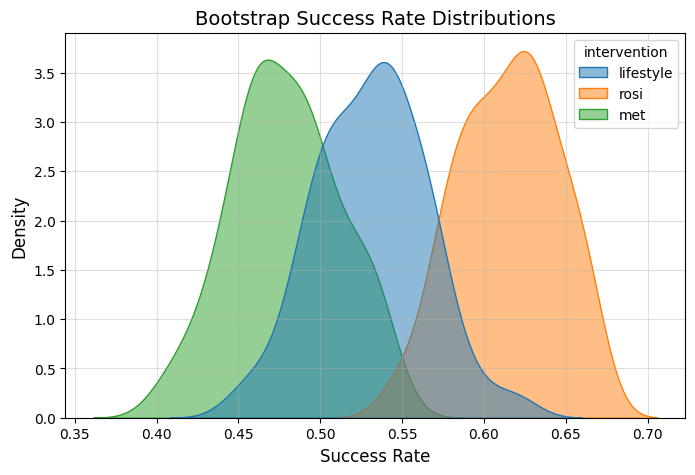

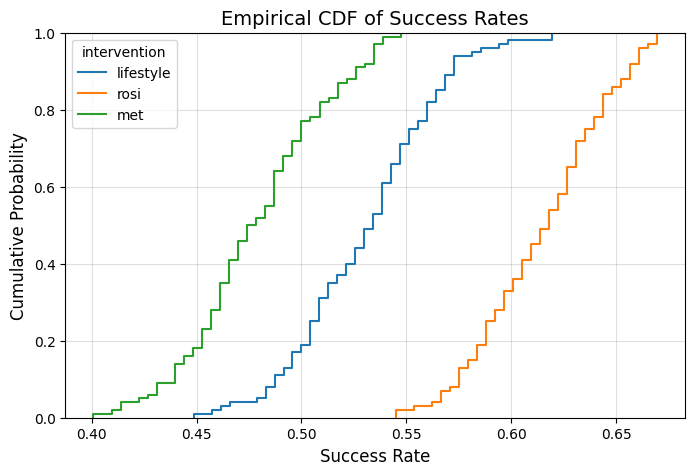

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/the_bootstrap/data/diabetes_hw.csv')

# Create a binary 'success' column based on the 'outcome' column
df['success'] = 0
df.loc[df['outcome'] == 'success', 'success'] = 1

# 1. Crosstabulations to summarize the outcomes by treatment
print("Crosstab of treatment and outcome:\n", pd.crosstab(df['treatment'], df['outcome']), '\n')
print("Crosstab with margins:\n", pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print("Normalized Crosstab with margins:\n", pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

# 2. Calculate success rates for each treatment group
lifestyle_success_rate = 125 / (125 + 109)
met_success_rate = 112 / (112 + 120)
rosi_success_rate = 143 / (143 + 90)

print(f"Lifestyle success rate: {lifestyle_success_rate:.2f}")
print(f"Met success rate: {met_success_rate:.2f}")
print(f"Rosi success rate: {rosi_success_rate:.2f}\n")

# 3. Bootstrapping success rates for each treatment group
# Filter the dataset by treatment groups
df_lif = df[df['treatment'] == 'lifestyle']
df_ros = df[df['treatment'] == 'rosi']
df_met = df[df['treatment'] == 'met']

# Number of bootstrap samples
S = 100
fx_lif = []
fx_ros = []
fx_met = []

# Bootstrap sampling for each treatment group
for _ in range(S):
    lif_sample = df_lif.sample(df_lif.shape[0], replace=True)
    ros_sample = df_ros.sample(df_ros.shape[0], replace=True)
    met_sample = df_met.sample(df_met.shape[0], replace=True)

    # Calculate success rates for each bootstrap sample
    fx_lif.append(np.mean(lif_sample['success']))
    fx_ros.append(np.mean(ros_sample['success']))
    fx_met.append(np.mean(met_sample['success']))

# Combine bootstrap results into a single DataFrame for visualization
gdf_lif = pd.DataFrame({'value': fx_lif, 'intervention': 'lifestyle'})
gdf_ros = pd.DataFrame({'value': fx_ros, 'intervention': 'rosi'})
gdf_met = pd.DataFrame({'value': fx_met, 'intervention': 'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

# 4. Visualize the bootstrap distributions
# KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=gdf, x='value', hue='intervention', fill=True, alpha=0.5)
plt.title("Bootstrap Success Rate Distributions", fontsize=14)
plt.xlabel("Success Rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

# ECDF Plot
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=gdf, x='value', hue='intervention')
plt.title("Empirical CDF of Success Rates", fontsize=14)
plt.xlabel("Success Rate", fontsize=12)
plt.ylabel("Cumulative Probability", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


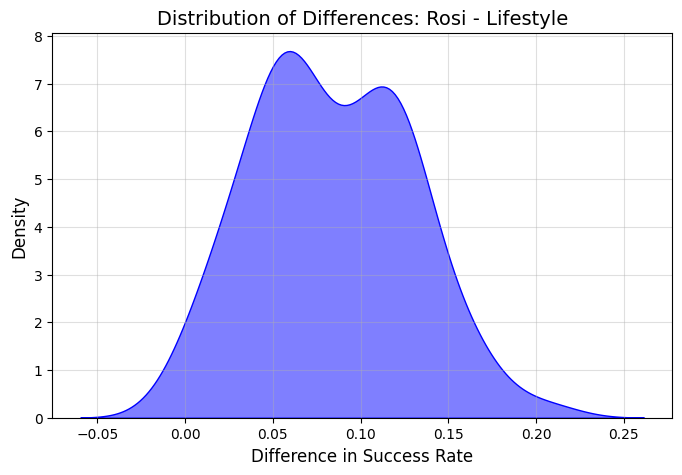

90% Confidence Interval (Rosi - Lifestyle): 0.0151 to 0.1569


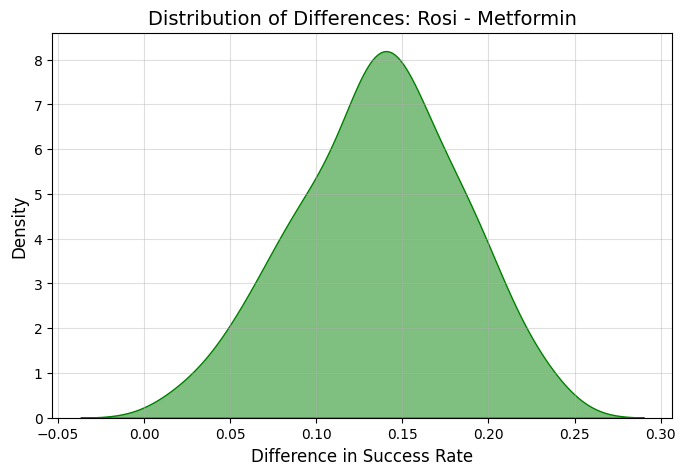

90% Confidence Interval (Rosi - Metformin): 0.0576 to 0.2087


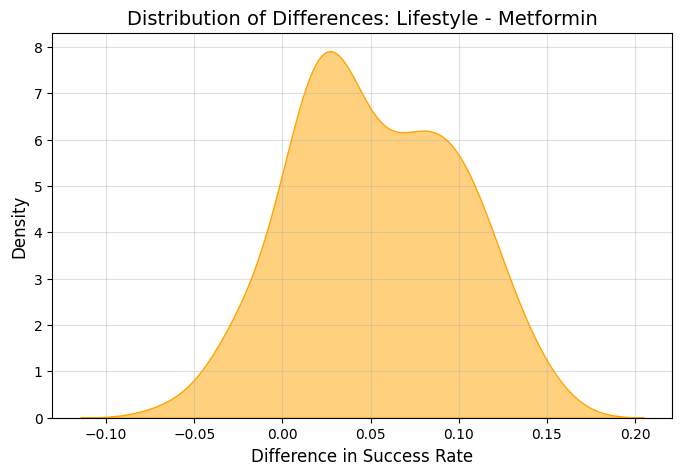

90% Confidence Interval (Lifestyle - Metformin): -0.0255 to 0.1249


In [11]:
# 4. Compare success rates between treatments

# Difference: Rosi vs. Lifestyle
rosi_versus_lifestyle = np.array(fx_ros) - np.array(fx_lif)
plt.figure(figsize=(8, 5))
sns.kdeplot(x=rosi_versus_lifestyle, fill=True, color="blue", alpha=0.5)
plt.title("Distribution of Differences: Rosi - Lifestyle", fontsize=14)
plt.xlabel("Difference in Success Rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

rosi_lifestyle_ci = (np.quantile(rosi_versus_lifestyle, 0.05), np.quantile(rosi_versus_lifestyle, 0.95))
print(f"90% Confidence Interval (Rosi - Lifestyle): {rosi_lifestyle_ci[0]:.4f} to {rosi_lifestyle_ci[1]:.4f}")

# Difference: Rosi vs. Metformin
rosi_versus_met = np.array(fx_ros) - np.array(fx_met)
plt.figure(figsize=(8, 5))
sns.kdeplot(x=rosi_versus_met, fill=True, color="green", alpha=0.5)
plt.title("Distribution of Differences: Rosi - Metformin", fontsize=14)
plt.xlabel("Difference in Success Rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

rosi_met_ci = (np.quantile(rosi_versus_met, 0.05), np.quantile(rosi_versus_met, 0.95))
print(f"90% Confidence Interval (Rosi - Metformin): {rosi_met_ci[0]:.4f} to {rosi_met_ci[1]:.4f}")

# Difference: Lifestyle vs. Metformin
lif_versus_met = np.array(fx_lif) - np.array(fx_met)
plt.figure(figsize=(8, 5))
sns.kdeplot(x=lif_versus_met, fill=True, color="orange", alpha=0.5)
plt.title("Distribution of Differences: Lifestyle - Metformin", fontsize=14)
plt.xlabel("Difference in Success Rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

lifestyle_met_ci = (np.quantile(lif_versus_met, 0.05), np.quantile(lif_versus_met, 0.95))
print(f"90% Confidence Interval (Lifestyle - Metformin): {lifestyle_met_ci[0]:.4f} to {lifestyle_met_ci[1]:.4f}")


because there is a 90% confidence interval, I would say Rosi is better than lifestyle. this means that this confidence that the difference in effect size is between .006 and .16. Rosi appears better than Metform, since the 90% confidence interval, which doesn't include zero.